# Assignment 02 ( Deep neural network )

---
Task 3

---
Checking Models’ Performance by Another Dataset

---


CSE 4238 - Soft Computing Lab

---


ID : 170104037

---


Sec : A

---


Date : 02/09/2021

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing necessary libraries

In [ ]:
import os
from os import path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

from mlxtend.data import loadlocal_mnist
import random

# Task 3  
*  Unzipping the dataset
*  New Dataset have total 60000 training images and 10000 test images

In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/Dataset_2.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/Dataset_2.zip
replace Dataset_2/t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [ ]:
training_images_filepath = '/content/Dataset_2/train-images-idx3-ubyte'
training_labels_filepath = '/content/Dataset_2/train-labels-idx1-ubyte'
test_images_filepath = '/content/Dataset_2/t10k-images-idx3-ubyte'
test_labels_filepath = '/content/Dataset_2/t10k-labels-idx1-ubyte'


X_train, y_train = loadlocal_mnist( training_images_filepath, training_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)


print('Dimension of training images:', np.shape(X_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(X_test))
print('Dimension of testing labels:',np.shape(y_test))

Dimension of training images: (60000, 784)
Dimension of trainig labels: (60000,)
Dimension of testing images: (10000, 784)
Dimension of testing labels: (10000,)


# Reshapping datas

In [ ]:
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print('Dimension of training images:', np.shape(X_train))
print('Dimension of testing images:', np.shape(X_test))

Dimension of training images: (60000, 28, 28)
Dimension of testing images: (10000, 28, 28)


## Plotting first five images from training and testing images

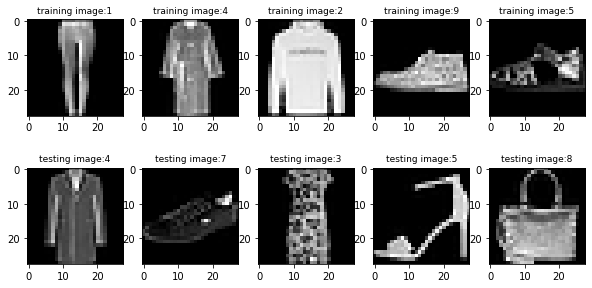

In [ ]:
def show(image, title):
    index = 1 
    plt.figure(figsize=(10,5))

    for x in zip(image, title):        
        image = x[0]        
        title = x[1]
        plt.subplot(2, 5, index)        
        plt.imshow(image, cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        index += 1


image = []
title = []
for i in range(0, 5):
    r = random.randint(1, len(X_train))
    image.append(X_train[r])
    title.append('training image:' + str(y_train[r]))       

for i in range(0, 5):
    r = random.randint(1, len(X_test))
    image.append(X_test[r])
    title.append('testing image:' + str(y_test[r]))
    
show(image, title)



---



---


# Preparing the dataset for future training


---



In [ ]:

class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):

        image = self.data[index]
        PIL_image = Image.fromarray(np.uint8(image)).convert('L')
        label = self.root[index]
        
        if self.transform is not None:
            image = self.transform(PIL_image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

TRAIN_PATH = '/content/training'
train_data = Dataset(X_train, y_train, train_transform)
test_data = Dataset(X_test, y_test, test_transform)

print("Trainig Samples: ",len(train_data))
print("Trainig Samples: ",len(test_data))

Trainig Samples:  60000
Trainig Samples:  10000


#An example of training data

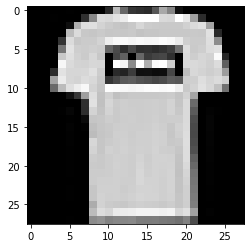

In [ ]:
show_img = train_data[1][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap = 'gray')

---

---

#Experiment 01 




---



---



#Hyperparameter Setting 1
*   No of hidden layers = 6
*   Hidden Nodes = 200
*   Iteration = 20000
*   Learning rate = 0.01
*   Batch size = 20
*   Number of epoch = 6
*   Activation Function : ReLU, PReLU, ReLU6
*   Optimizer : SGD
*   Accuracy : 85.88%
*   Loss : 0.48


In [ ]:
batch_size = 20
num_iters = 20500  #till 20000
input_dim = 28*28
output_dim = 10
learning_rate = 0.01
num_hidden = 200  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:3000
Test dataloader:500


In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

6





---


*   Lenght of train data
*   Lenght of test data
*   Shape of an image



---





In [ ]:
print(len(train_data))
print(len(test_data))
print(train_data[0][0].shape)

60000
10000
torch.Size([1, 28, 28])


In [ ]:
#1
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.PReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU6()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 4th hidden layer
        self.relu_4 = nn.PReLU()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 5th hidden layer
        self.relu_5 = nn.PReLU()

        ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 6th hidden layer
        self.relu_6 = nn.PReLU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ## Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ## Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ## Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ## Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
#1
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): PReLU(num_parameters=1)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU6()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): PReLU(num_parameters=1)
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): PReLU(num_parameters=1)
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): PReLU(num_parameters=1)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)



---



*   Optimizer = SGD



---



In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
#1
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels.long())

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.294738292694092. Accuracy: 22.41
Iteration: 1000. Loss: 2.1688311100006104. Accuracy: 18.78
Iteration: 1500. Loss: 1.5667593479156494. Accuracy: 38.25
Iteration: 2000. Loss: 0.6104971170425415. Accuracy: 59.23
Iteration: 2500. Loss: 0.9386148452758789. Accuracy: 66.59
Iteration: 3000. Loss: 1.0267003774642944. Accuracy: 71.47
Iteration: 3500. Loss: 0.7232053279876709. Accuracy: 70.56
Iteration: 4000. Loss: 0.8891282081604004. Accuracy: 77.13
Iteration: 4500. Loss: 0.7529645562171936. Accuracy: 75.66
Iteration: 5000. Loss: 0.5762012004852295. Accuracy: 79.42
Iteration: 5500. Loss: 0.6208900213241577. Accuracy: 79.31
Iteration: 6000. Loss: 0.7261937856674194. Accuracy: 78.67
Iteration: 6500. Loss: 0.48422154784202576. Accuracy: 81.65
Iteration: 7000. Loss: 0.28587713837623596. Accuracy: 82.14
Iteration: 7500. Loss: 0.4246792197227478. Accuracy: 83.05
Iteration: 8000. Loss: 0.5408623814582825. Accuracy: 83.88
Iteration: 8500. Loss: 0.31525304913520813. Accuracy: 83

---

# Loss vs Iteration graph

---



[2.302619695663452, 2.301520586013794, 2.301344394683838, 2.3017008304595947, 2.298424243927002, 2.295056104660034, 2.2872097492218018, 2.246041774749756, 2.172194480895996, 2.2304906845092773, 2.2397708892822266, 2.055833101272583, 2.0894343852996826, 2.109926700592041, 2.0311765670776367, 2.2237014770507812, 1.9912402629852295, 2.064894199371338, 1.7893942594528198, 1.779406189918518, 1.7777413129806519, 1.7032907009124756, 1.8017576932907104, 1.8320232629776, 1.6050262451171875, 1.5598987340927124, 1.5226496458053589, 1.7190179824829102, 1.5439201593399048, 1.4719868898391724, 1.4730815887451172, 1.541635274887085, 1.6204289197921753, 1.3752704858779907, 1.7709044218063354, 1.3603358268737793, 1.351182222366333, 1.1229543685913086, 1.4787349700927734, 1.2219908237457275]


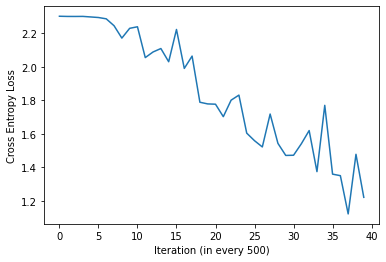

In [ ]:
#1
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'

save_model = True

if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), root_path + 'Experiment_1.pkl') 

# Prediction for Experiment 1


*  Loading the model of experiment 01
*  Plotting first 5 images
*  Predict the labels



Trained Model Loaded


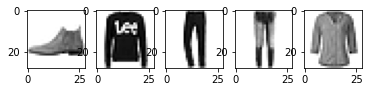

Predicted labels [9 2 1 1 6]


In [ ]:
#Load model
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Experiment_1.pkl'))
    print('Trained Model Loaded')

#Plotting first five image
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

#Prediction
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())



---


# **Experiment 02**


---




#Hyperparameter Setting 5
*   No of hidden layers = 2
*   Hidden Nodes = 600
*   Iteration = 80500
*   Learning rate = 0.03
*   Batch size = 64
*   Number of epoch = 85
*   Activation Function : ReLU, ReLU6
*   Optimizer : SGD
*   Accuracy : 89.74%
*   Loss : 0.01

In [ ]:
#5
batch_size = 64
num_iters = 80500
input_dim = 28*28
output_dim = 10
learning_rate = 0.03
num_hidden = 600  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:938
Test dataloader:157


In [ ]:
#5
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

85


In [ ]:
#5
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 32400 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


#5
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=600, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=600, out_features=600, bias=True)
  (relu_2): ReLU6()
  (linear_out): Linear(in_features=600, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
#5
iteration_loss = []
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels.long())

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.3595268428325653. Accuracy: 79.92
Iteration: 1000. Loss: 0.5377780795097351. Accuracy: 80.78
Iteration: 1500. Loss: 0.4904397428035736. Accuracy: 83.23
Iteration: 2000. Loss: 0.4318552017211914. Accuracy: 84.18
Iteration: 2500. Loss: 0.38876163959503174. Accuracy: 83.92
Iteration: 3000. Loss: 0.3184318244457245. Accuracy: 84.43
Iteration: 3500. Loss: 0.26890650391578674. Accuracy: 85.9
Iteration: 4000. Loss: 0.3927730917930603. Accuracy: 86.24
Iteration: 4500. Loss: 0.392057329416275. Accuracy: 86.61
Iteration: 5000. Loss: 0.28867292404174805. Accuracy: 86.54
Iteration: 5500. Loss: 0.33942124247550964. Accuracy: 86.82
Iteration: 6000. Loss: 0.35227131843566895. Accuracy: 86.68
Iteration: 6500. Loss: 0.26787033677101135. Accuracy: 87.32
Iteration: 7000. Loss: 0.2425685077905655. Accuracy: 86.38
Iteration: 7500. Loss: 0.3669516146183014. Accuracy: 86.54
Iteration: 8000. Loss: 0.2548591196537018. Accuracy: 87.62
Iteration: 8500. Loss: 0.241877943277359. Accuracy: 8

[0.3595268428325653, 0.5377780795097351, 0.4904397428035736, 0.4318552017211914, 0.38876163959503174, 0.3184318244457245, 0.26890650391578674, 0.3927730917930603, 0.392057329416275, 0.28867292404174805, 0.33942124247550964, 0.35227131843566895, 0.26787033677101135, 0.2425685077905655, 0.3669516146183014, 0.2548591196537018, 0.241877943277359, 0.21258358657360077, 0.5243950486183167, 0.2796107530593872, 0.34547901153564453, 0.19516173005104065, 0.15571343898773193, 0.22162407636642456, 0.1975792944431305, 0.20136992633342743, 0.1700715571641922, 0.11807166039943695, 0.17700780928134918, 0.28738898038864136, 0.19753219187259674, 0.21866321563720703, 0.23103059828281403, 0.1740044504404068, 0.1845092922449112, 0.19985856115818024, 0.13836398720741272, 0.2794879078865051, 0.30832144618034363, 0.13085651397705078, 0.0563749223947525, 0.1315886378288269, 0.24796248972415924, 0.19898559153079987, 0.11700547486543655, 0.20825442671775818, 0.0884769931435585, 0.11848483234643936, 0.185584589838

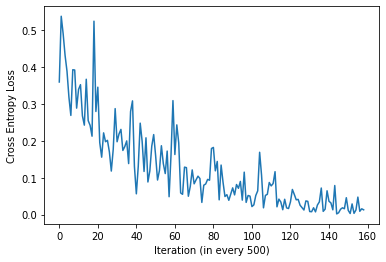

In [ ]:
#5
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'

save_model = True

if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), root_path + 'Experiment_5.pkl') 

# Prediction for Experiment 02


*  Loading the model of experiment 01
*  Plotting first 5 images
*  Predict the labels

Trained Model Loaded


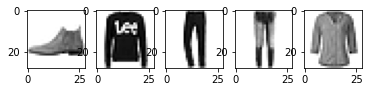

Predicted labels [9 2 1 1 6]


In [ ]:
#Load model
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Experiment_5.pkl'))
    print('Trained Model Loaded')

#Plotting first five image
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

#Prediction
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

In [ ]:
#table for 5 settings

values = []
setting = ['Exp 1','Exp 5']
Accu = ['85.88%','89.74%']
Loss = ['0.48','0.01']
Batch_sz = ['20','64']
num_itr = ['20,000','80,500']
epoch = ['6','85']
learning_rate = ['0.01','0.03']
Optimizr = ['SGD','SGD']
Hidden_nodes = ['200','600']
Hidden_layer = ['6','2']
Activation_func = ['ReLU,ReLU6,PReLU','ReLU,ReLU6']

for i in range(len(setting)):
    values.append([setting[i],Accu[i],Loss[i],Batch_sz[i],num_itr[i],epoch[i],learning_rate[i],Optimizr[i],Hidden_nodes[i],Hidden_layer[i],Activation_func[i] ])
     
colName = ['Setting No','Accuracy','Loss','Batch Size','Num_Iters','Epoch','Learning Rate','Optimizer','Hidden Nodes','Number of Hidden layer','Activation Function']
df = pd.DataFrame (values,columns = colName)
df

,Setting No,Accuracy,Loss,Batch Size,Num_Iters,Epoch,Learning Rate,Optimizer,Hidden Nodes,Number of Hidden layer,Activation Function
0,Exp 1,85.88%,0.48,20,"20,000",6,0.01,SGD,200,6,"ReLU,ReLU6,PReLU"
1,Exp 5,89.74%,0.01,64,"80,500",85,0.03,SGD,600,2,"ReLU,ReLU6"
